In [219]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn")

## Question 1

In [241]:
u_1 = -2
u_2 = -3

x = cp.Variable(2)

A = np.array([[1, 2], [1, -4]])
P = np.array([[1, -1/2], [-1/2, 2]])
f = np.array([-1, 0])

objective = cp.Minimize(cp.quad_form(x, P) + f @ x)
constraints = [A @ x <= np.array([u_1, u_2]), np.array([1, 1]) @ x >= -5]

prob = cp.Problem(objective, constraints)

result = prob.solve()

In [245]:
print(f"Optimal x_2: {x.value[1]:.3f}")
print(f"Optimal \\lambda_3: {constraints[1].dual_value:.3f}")

Optimal x_2: 0.167
Optimal \lambda_3: 0.000


In [248]:
def predict(orig_optimal, lambda_, delta_1, delta_2):
    return orig_optimal - lambda_[0] * delta_1 - lambda_[1] * delta_2
    
def solve(delta_1, delta_2):
    u_1 = -2 + delta_1
    u_2 = -3 + delta_2

    x = cp.Variable(2)

    A = np.array([[1, 2], [1, -4]])
    P = np.array([[1, -1/2], [-1/2, 2]])
    f = np.array([-1, 0])

    objective = cp.Minimize(cp.quad_form(x, P) + f @ x)
    constraints = [A @ x <= np.array([u_1, u_2]), np.array([1, 1]) @ x >= -5]

    prob = cp.Problem(objective, constraints)

    result = prob.solve()
    return result

In [249]:
lambda_ = constraints[0].dual_value

rows = []
for delta_1 in [0, -0.1, 0.1]:
    for delta_2 in [0, -0.1, 0.1]:
        rows.append({
            "delta_1": delta_1,
            "delta_2": delta_2,
            "predicted": predict(result, lambda_, delta_1, delta_2),
            "exact": solve(delta_1, delta_2),
        })
        
perturb = pd.DataFrame(rows)
# Make the index line up with the question, ie starts at 1
perturb.index += 1

In [250]:
assert (perturb["predicted"] <= perturb["exact"]).all()
perturb["diff"] = perturb["exact"] - perturb["predicted"]
perturb.sort_values("diff")

,delta_1,delta_2,predicted,exact,diff
1,0.0,0.0,8.222222,8.222222,0.000000
8,0.1,-0.1,8.127778,8.130000,0.002222
3,0.0,0.1,7.977778,7.980000,0.002222
2,0.0,-0.1,8.466667,8.468889,0.002222
6,-0.1,0.1,8.316667,8.318889,0.002222
7,0.1,0.0,7.883333,7.887222,0.003889
4,-0.1,0.0,8.561111,8.565000,0.003889
5,-0.1,-0.1,8.805556,8.815556,0.010000
9,0.1,0.1,7.638889,7.648889,0.010000


## Question 2

In [156]:
x = cp.Variable(1)

objective = cp.Minimize(x ** 2 + 1)
constraints = [x ** 2 - 6 * x + 8 <= 0]

prob = cp.Problem(objective, constraints)

result = prob.solve()
result

4.999999979918552

/Users/aliteeney/Library/Caches/pypoetry/virtualenvs/convex-optimisation-eS08SJPC-py3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


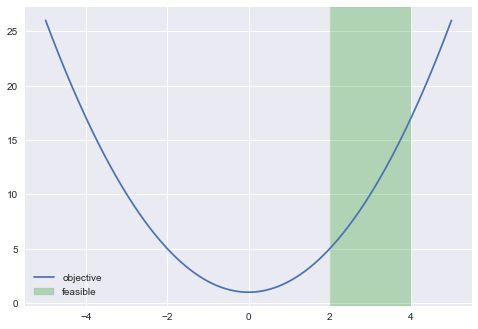

In [177]:
p = np.linspace(-5, 5, 1000)

plt.plot(p, p ** 2 + 1, label="objective")
cond = (p - 2) * (p - 4) <= 0
plt.axvspan(p[cond].min(), p[cond].max(), alpha=0.3, color="tab:green", label="feasible")
plt.gca().legend()

In [179]:
def dual(la):
    return - 9 * la ** 2 / (1 + la) + 1 + 8 * la
    
dual(1), dual(2), dual(3), dual(4) 

(4.5, 5.0, 4.75, 4.199999999999999)

## Question 4

In [211]:
r = 1.05
m = 200
n = 7
V = np.zeros((m, n))

F = 0.9
C = 1.15

V[:, 0] = r
V[:, 1] = np.linspace(0, 2, m)
V[:, 2] = (V[:, 1] - 1.1).clip(0)
V[:, 3] = (V[:, 1] - 1.2).clip(0)
V[:, 4] = (0.8 - V[:, 1]).clip(0)
V[:, 5] = (0.7 - V[:, 1]).clip(0)
V[:, 6] = (V[:, 1] - 1).clip(min=F - 1, max=C - 1)

p = np.array([1, 1, 0.06, 0.03, 0.02, 0.01])

In [218]:
p_collar = cp.Variable(1)
y = cp.Variable(m)

constraints = [y >= 0, (V.T @ y)[:-1] == p, (V.T @ y)[-1] == p_collar]

objective = cp.Minimize(p_collar)
prob = cp.Problem(objective, constraints)
lower_bound = prob.solve()

objective = cp.Maximize(p_collar)
prob = cp.Problem(objective, constraints)
upper_bound = prob.solve()

print(f"Bound on collar price: {lower_bound:.3f}, {upper_bound:.3f}")

Bound on collar price: 0.033, 0.065
